In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Logistic Regression
Logistic Regression ist eine Variante der linearen Regression, die für binäre Klassifikationen verwendet wird.

Einlesen des Trainingsdatensatzes und des Testdatensatzes.

In [35]:
def read_data():
    train_set = pd.read_csv('../data/train_set.csv')
    test_set = pd.read_csv('../data/test_set.csv')
    train_labels = pd.read_csv('../data/train_labels.csv')
    test_labels = pd.read_csv('../data/test_labels.csv')
    return train_set, test_set, train_labels, test_labels

train_set, test_set, train_labels, test_labels = read_data()

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_set, train_labels)


/home/marius/miniforge3/envs/ML/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# LogReg Evaluation

In [37]:
predictions = pd.Series(logreg.predict(test_set))

acc_log_train = logreg.score(train_set, train_labels) * 100
print('Training accuracy:', round(acc_log_train,2,), "%")

acc_log_test = logreg.score(test_set, test_labels) * 100
print('Test accuracy:', round(acc_log_test,2,), "%")

Training accuracy: 74.5 %
Test accuracy: 76.62 %


In [38]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(test_labels, predictions))
print('\n')
print(classification_report(test_labels, predictions))

[[76 24]
 [12 42]]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81       100
           1       0.64      0.78      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154



In [39]:
# Precision and Recall:

from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_labels, predictions, pos_label=1)
recall = recall_score(test_labels, predictions, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6363636363636364
Recall: 0.7777777777777778


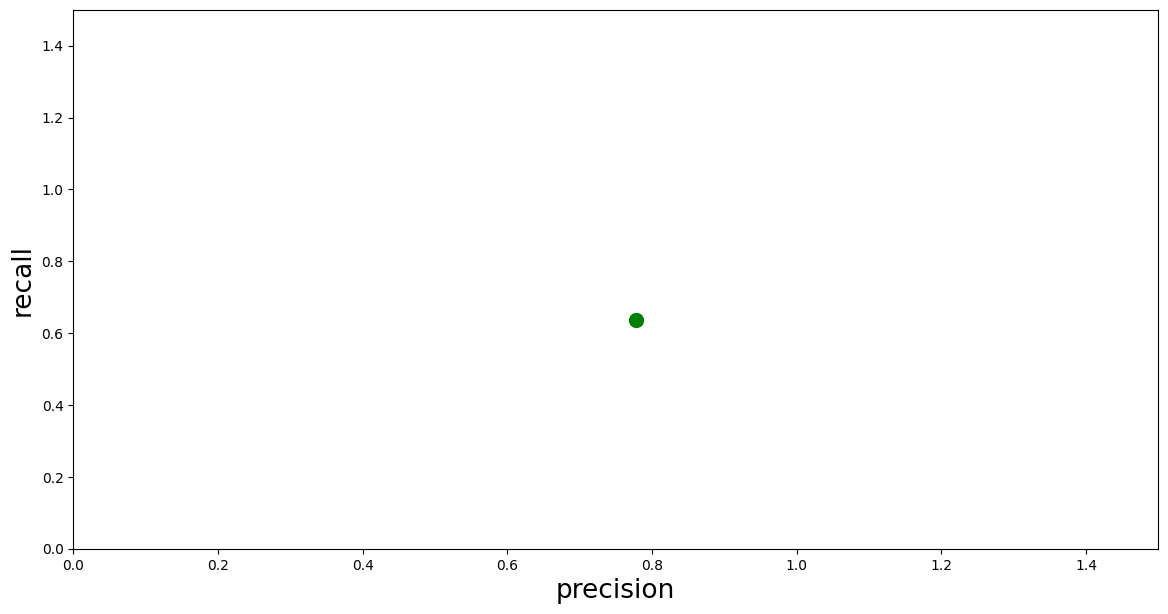

In [40]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "go", markersize = 10)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

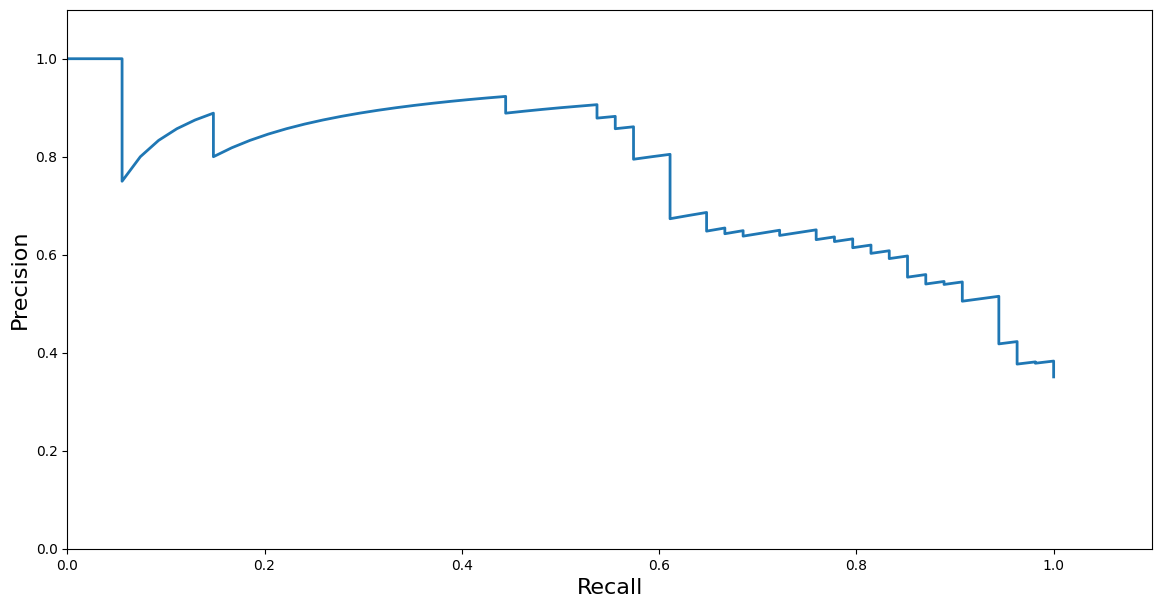

In [41]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = logreg.predict_proba(test_set)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(test_labels, y_scores, pos_label=1)

# plotting them against each other
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1.1, 0, 1.1])
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)

plt.figure(figsize=(14, 7))
plot_precision_recall_curve(precision, recall)
plt.show()

In [44]:
from sklearn.metrics import f1_score

round(f1_score(test_labels, predictions, pos_label=1),2)

np.float64(0.7)

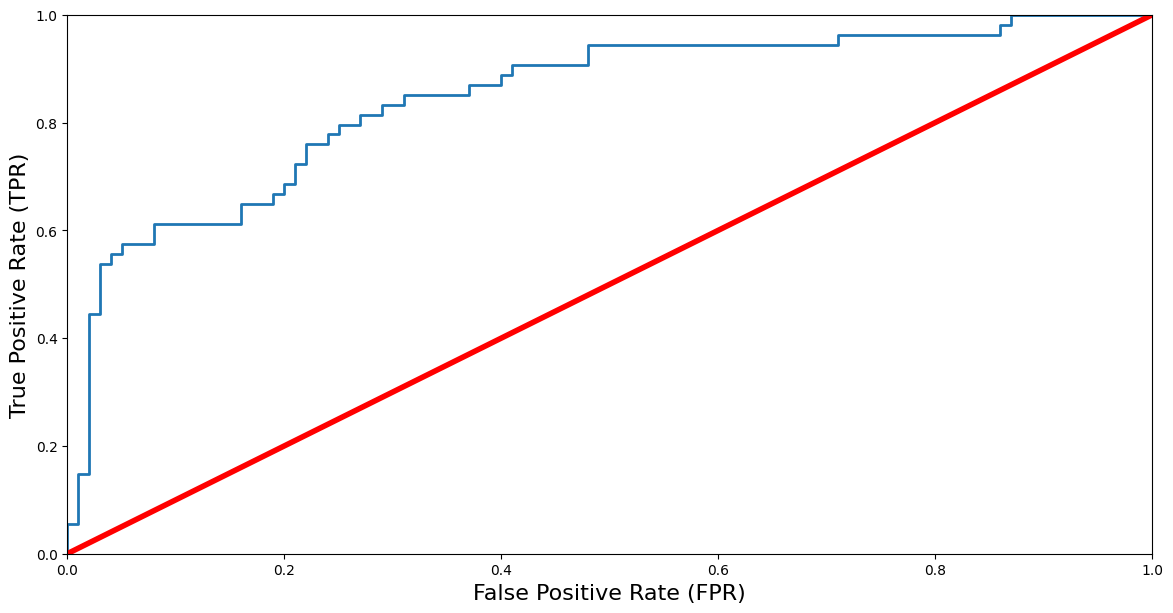

In [46]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, y_scores, pos_label=1)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_set, train_labels)

knn_prediction = knn.predict(test_set)

/home/marius/miniforge3/envs/ML/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# KNN Evaluation